In [2]:
import numpy as np
import pandas as pd
import umap
from sklearn.preprocessing import quantile_transform
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
import xarray as xr

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
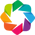

In [4]:
import holoviews as hv
from holoviews import dim, opts
import colorcet as cc
import datashader as ds
import datashader.transfer_functions as tf
from holoviews.operation.datashader import datashade, shade
from datashader.colors import Sets1to3 # default datashade() and shade() color cycle
import hdbscan
from fastcluster import linkage
from sklearn.preprocessing import minmax_scale
from scipy.cluster.hierarchy import dendrogram

# Visualization package imports.
import datashader as ds
import datashader.transfer_functions as tf
from holoviews.operation.datashader import datashade, bundle_graph
hv.extension('bokeh')

In [6]:
counts = "/scidas/osativa_heat_drought/02-create_GEM/01-Kamiak_GEM/GEM-log-no.txt"
labels = "/scidas/osativa_heat_drought/01-input_data/rice_PRJNA301554.sample_annots.txt"

### Read in data

In [ ]:
def load_gem(gem_path, label_path=None, fillna=0):
    """Loads a GEM file into a Dask dataframe.
    
    The GEM file is assumed to be in the format produced by KINC:
        + Samples as columns.
        + Rows as genes.
        + Tab-delimited format.
    """
    # Read in the GEM as a pandas dataframe object.
    gem_df = pd.read_csv(gem_path, index_col=0, sep='\t').apply(np.exp2).fillna(0).T
    # Declare an index name so it matches the (future) label data frame.
    gem_df.index.rename('Sample')
    
    # Store the GEM in an Xarray object.
    gem_xr = xr.DataArray(gem_df,  dims=['Sample', 'Genes'])
    gem_data_dict = {'gem': gem_xr}

    # Load the labels, if given.
    if label_path:
        label_df = pd.read_csv(label_path, index_col=0, sep='\t')
        for col in label_df:
            # Create a DataArray for each column of the labels.
            gem_data_dict[col] = xr.DataArray(label_df[col])

    # Conver to an xarray dataset object and return.
    gem_ds = xr.Dataset(gem_data_dict)

    return gem_ds

In [9]:
%%time
count_df = pd.read_csv(counts, index_col=0, sep='\t').apply(np.exp2).fillna(0).T
count_df.index.name = 'Sample'

CPU times: user 9.77 s, sys: 896 ms, total: 10.7 s
Wall time: 14.3 s


In [10]:
count_df.head(2)

ChrSy.fgenesh.mRNA.1  ChrSy.fgenesh.mRNA.10  \
Sample                                                    
SRR2931040                   0.0                    0.0   
SRR2931041                   0.0                    0.0   

            ChrSy.fgenesh.mRNA.11  ChrSy.fgenesh.mRNA.12  \
Sample                                                     
SRR2931040                    0.0                    0.0   
SRR2931041                    0.0                    0.0   

            ChrSy.fgenesh.mRNA.13  ChrSy.fgenesh.mRNA.14  \
Sample                                                     
SRR2931040               0.067854               0.016607   
SRR2931041               0.000000               0.000000   

            ChrSy.fgenesh.mRNA.15  ChrSy.fgenesh.mRNA.16  \
Sample                                                     
SRR2931040                    0.0                    0.0   
SRR2931041                    0.0                    0.0   

            ChrSy.fgenesh.mRNA.17  ChrSy.fgenesh.mRNA.18  ...  \
Sample                                                    ...   
SRR2931040                0.00000                    0.0  ...   
SRR2931041                0.00174                    0.0  ...   

            LOC_Os12g44350.1  LOC_Os12g44360.1  LOC_Os12g44360.2  \
Sample                                                             
SRR2931040          0.071080          8.261979          0.280152   
SRR2931041          0.095179          0.000000          1.907564   

            LOC_Os12g44360.3  LOC_Os12g44360.4  LOC_Os12g44370.1  \
Sample                                                             
SRR2931040               0.0          1.019110          4.019771   
SRR2931041               0.0          3.137403          4.466249   

            LOC_Os12g44380.1  LOC_Os12g44380.2  LOC_Os12g44380.3  \
Sample                                                             
SRR2931040         10.964018          4.326514          0.129365   
SRR2931041          5.605721          1.003356          0.584818   

            LOC_Os12g44390.1  
Sample                        
SRR2931040         14.418388  
SRR2931041          8.829689  

[2 rows x 66338 columns]

In [11]:
# list(count_df.columns)

In [12]:
count_df.shape

(462, 66338)

#### Normalize Data

In [13]:
%%time
nxdf = pd.DataFrame(quantile_transform(count_df), 
                    columns=count_df.columns, index=count_df.index)

CPU times: user 1min 48s, sys: 1.75 s, total: 1min 49s
Wall time: 1min 49s


In [14]:
label_df = pd.read_csv(labels, index_col=0, sep='\t')
label_df.head(2)

Treatment  Time Tissue Genotype Subspecies
Sample                                               
SRR2931040   CONTROL    15   leaf       AZ   Japonica
SRR2931041   CONTROL    15   leaf       AZ   Japonica

In [15]:
label_df['Genotype'].unique()

array(['AZ', 'KP', 'PW', 'TD'], dtype=object)

### Create UMAP Embedding

In [16]:
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=200)
embedding = pd.DataFrame(reducer.fit_transform(nxdf), index=nxdf.index,
                         columns=['x', 'y'])
df = pd.concat([embedding, label_df], axis=1, sort=False)
df.head(2)

x         y Treatment  Time Tissue Genotype Subspecies
Sample                                                                   
SRR2931040  2.192477  1.643746   CONTROL    15   leaf       AZ   Japonica
SRR2931041 -0.505748  2.754095   CONTROL    15   leaf       AZ   Japonica

In [17]:
def umap_points(group):
    points = hv.Points(df).groupby(group) \
    .opts(size=6, height=500, width=500) \
    .overlay()
    return points

upoints = {key: umap_points(key) for key in ['Subspecies', 'Treatment', 'Genotype']}
hv.HoloMap(upoints, kdims='Group')

:HoloMap   [Group]
   :NdOverlay   [Treatment]
      :Points   [x,y]   (Treatment,Time,Tissue,Genotype,Subspecies)

# View GEM as an Image

In [18]:
xarr = xr.DataArray(nxdf)
dsd = {'counts': xarr}

for col in label_df:
    dsd[col] = xr.DataArray(label_df[col])

yarr = xr.DataArray(dsd)
gds = xr.Dataset(dsd)

In [75]:
xarr.shape[0]

462

In [59]:
(datashade(hv.Image(gds.where(gds.Subspecies == 'Japonica').counts.values), cmap=cc.cm['kg']) * \
datashade(hv.Image(gds.where(gds.Subspecies == 'Indica').counts.values), cmap=cc.cm['kb'])).opts(width=1000, height=500, xaxis=None, yaxis=None, toolbar=None)

:DynamicMap   []
   :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B,A)
      .RGB.II :RGB   [x,y]   (R,G,B,A)

In [21]:
# (datashade(hv.Image(gds.where(gds.Genotype == 'AZ').counts.values), cmap=cc.cm['linear_bgy_10_95_c74']) * \
#  datashade(hv.Image(gds.where(gds.Genotype == 'KP').counts.values), cmap=cc.cm['linear_blue_95_50_c20']) * \
#  datashade(hv.Image(gds.where(gds.Genotype == 'PW').counts.values), cmap=cc.cm['linear_ternary_green_0_46_c42']) * \
#  datashade(hv.Image(gds.where(gds.Genotype == 'TD').counts.values), cmap=cc.cm['linear_ternary_red_0_50_c52'])
# ).opts(width=1000, height=500)

In [22]:
# gds = gds.sortby('Treatment')
# (datashade(hv.Image(gds.where(gds.Treatment == 'CONTROL').counts.values), cmap=cc.cm['linear_blue_5_95_c73']) * \
#  datashade(hv.Image(gds.where(gds.Treatment == 'HEAT').counts.values), cmap=cc.cm['linear_kry_5_98_c75']) * \
#  datashade(hv.Image(gds.where(gds.Treatment == 'RECOV_HEAT').counts.values), cmap=cc.cm['linear_kry_5_98_c75']) * \
#  datashade(hv.Image(gds.where(gds.Treatment == 'DROUGHT').counts.values), cmap=cc.cm['linear_ternary_green_0_46_c42']) * \
#  datashade(hv.Image(gds.where(gds.Treatment == 'RECOV_DROUGHT').counts.values), cmap=cc.cm['linear_ternary_green_0_46_c42'])
# ).opts(width=1000, height=500)

In [ ]:
def raster_gem(gem_xds, gem_key='gem', color_key=None, palette=cm.tab10.colors):
    """Draws a raster image of a given GEM dataframe."""
    image_bounds = (0, 0, gem_xds[gem_key].shape[1], gem_xds[gem_key].shape[0])
    
    if not color_key:
        return datashade(hv.Image(gem_xds[gem_key].values, bounds=image_bounds))
    
    unique_labels = np.unique(gem_xds[color_key].values)
    color_maps = cycle([LinearSegmentedColormap.from_list(x, ['k', c])
                        for x, c in zip(unique_labels, palette)])
    
    images = []
    for label, color in zip(unique_labels, color_maps):
        
        subset = gem_xds.where(gem_xds[color_key] == label)[gem_key].values
        images.append(datashade(hv.Image(subset, bounds=image_bounds), cmap=color))
        
    return hv.Overlay(images).collate()

# Clustering

In [ ]:
def linkage_dendrogram_render(data):
    """Draw a dendrogram linkage adjacent to a rasterized count dataset."""
    
    # Create the linkage from the given values.
    linked = linkage(data.values, 'single')
    
    # Calculate the dendrogram and extract needed values into a DataFrame.
    dend = dendrogram(linked, truncate_mode='lastp', no_plot=True)
    dend_df = pd.DataFrame({'icoord': dend['icoord'],
                            'dcoord': dend['dcoord'],
                            'colors': dend['color_list']})
    
    paths = []

    for idx, row in dend_df.iterrows():
        i, d, c = row
        paths.append(hv.Path({'x': d, 'y': i}).opts(color=c))
        
    dend = hv.Overlay(paths).opts(invert_xaxis=True, xaxis=None, yaxis=None, padding=0.1, toolbar=None)

    return 

In [60]:
linked = linkage(embedding.values, 'single')
dend = dendrogram(linked, no_plot=True)

In [89]:
linked

array([[2.90000000e+01, 3.40000000e+01, 1.02651573e-02, 2.00000000e+00],
       [1.90000000e+02, 1.94000000e+02, 1.24044175e-02, 2.00000000e+00],
       [4.11000000e+02, 4.12000000e+02, 1.37379983e-02, 2.00000000e+00],
       ...,
       [1.79000000e+02, 9.09000000e+02, 4.44811901e-01, 1.10000000e+02],
       [9.16000000e+02, 9.19000000e+02, 5.43472643e-01, 3.52000000e+02],
       [9.20000000e+02, 9.21000000e+02, 1.85346641e+00, 4.62000000e+02]])

In [69]:
dend.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [68]:
# dend['leaves']

In [56]:
dend_df = pd.DataFrame({
    'icoord': dend['icoord'],
    'dcoord': dend['dcoord'],
    'colors': dend['color_list']
})
dend_df.head(2)

icoord  \
0  [35.0, 35.0, 45.0, 45.0]   
1  [25.0, 25.0, 40.0, 40.0]   

                                              dcoord colors  
0  [0.0, 0.05746850106445041, 0.05746850106445041...      g  
1  [0.0, 0.10969356961377928, 0.10969356961377928...      g

In [86]:
len(dend['leaves'])

462

In [ ]:
df = pd.DataFrame(dend_df['icoord'].values.tolist())


In [1]:
# pd.DataFrame(dend_df['icoord'].values.tolist())

In [74]:
from sklearn.preprocessing import minmax_scale

In [80]:
minmax_scale(np.array(dend['icoord']), (0, xarr.shape[0]))

array([[  3.01304348,   3.01304348,   1.26022913,   1.26022913],
       [  2.00869565,   2.00869565,   0.75613748,   0.75613748],
       [  1.00434783,   1.00434783,   0.        ,   0.        ],
       ...,
       [336.30779098, 336.30779098, 436.13336631, 436.13336631],
       [142.5815121 , 142.5815121 , 385.4764855 , 385.4764855 ],
       [ 21.07905574,  21.07905574, 262.91499733, 262.91499733]])

In [57]:
paths = []

for idx, row in dend_df.iterrows():
    i, d, c = row
    paths.append(hv.Path({'x': d, 'y': i}).opts(color=c))

hv.Overlay(paths).opts(invert_xaxis=True, xaxis=None, yaxis=None, padding=0.1, toolbar=None)

:Overlay
   .Path.I           :Path   [x,y]
   .Path.II          :Path   [x,y]
   .Path.III         :Path   [x,y]
   .Path.IV          :Path   [x,y]
   .Path.V           :Path   [x,y]
   .Path.VI          :Path   [x,y]
   .Path.VII         :Path   [x,y]
   .Path.VIII        :Path   [x,y]
   .Path.IX          :Path   [x,y]
   .Path.X           :Path   [x,y]
   .Path.XI          :Path   [x,y]
   .Path.XII         :Path   [x,y]
   .Path.XIII        :Path   [x,y]
   .Path.XIV         :Path   [x,y]
   .Path.XV          :Path   [x,y]
   .Path.XVI         :Path   [x,y]
   .Path.XVII        :Path   [x,y]
   .Path.XVIII       :Path   [x,y]
   .Path.XIX         :Path   [x,y]
   .Path.XX          :Path   [x,y]
   .Path.XXI         :Path   [x,y]
   .Path.XXII        :Path   [x,y]
   .Path.XXIII       :Path   [x,y]
   .Path.XXIV        :Path   [x,y]
   .Path.XXV         :Path   [x,y]
   .Path.XXVI        :Path   [x,y]
   .Path.XXVII       :Path   [x,y]
   .Path.XXVIII      :Path   [x,y]
   .Path.XXIX        :Path   [x,y]
   .Path.XXX         :Path   [x,y]
   .Path.XXXI        :Path   [x,y]
   .Path.XXXII       :Path   [x,y]
   .Path.XXXIII      :Path   [x,y]
   .Path.XXXIV       :Path   [x,y]
   .Path.XXXV        :Path   [x,y]
   .Path.XXXVI       :Path   [x,y]
   .Path.XXXVII      :Path   [x,y]
   .Path.XXXVIII     :Path   [x,y]
   .Path.XXXIX       :Path   [x,y]
   .Path.XL          :Path   [x,y]
   .Path.XLI         :Path   [x,y]
   .Path.XLII        :Path   [x,y]
   .Path.XLIII       :Path   [x,y]
   .Path.XLIV        :Path   [x,y]
   .Path.XLV         :Path   [x,y]
   .Path.XLVI        :Path   [x,y]
   .Path.XLVII       :Path   [x,y]
   .Path.XLVIII      :Path   [x,y]
   .Path.XLIX        :Path   [x,y]
   .Path.L           :Path   [x,y]
   .Path.LI          :Path   [x,y]
   .Path.LII         :Path   [x,y]
   .Path.LIII        :Path   [x,y]
   .Path.LIV         :Path   [x,y]
   .Path.LV          :Path   [x,y]
   .Path.LVI         :Path   [x,y]
   .Path.LVII        :Path   [x,y]
   .Path.LVIII       :Path   [x,y]
   .Path.LIX         :Path   [x,y]
   .Path.LX          :Path   [x,y]
   .Path.LXI         :Path   [x,y]
   .Path.LXII        :Path   [x,y]
   .Path.LXIII       :Path   [x,y]
   .Path.LXIV        :Path   [x,y]
   .Path.LXV         :Path   [x,y]
   .Path.LXVI        :Path   [x,y]
   .Path.LXVII       :Path   [x,y]
   .Path.LXVIII      :Path   [x,y]
   .Path.LXIX        :Path   [x,y]
   .Path.LXX         :Path   [x,y]
   .Path.LXXI        :Path   [x,y]
   .Path.LXXII       :Path   [x,y]
   .Path.LXXIII      :Path   [x,y]
   .Path.LXXIV       :Path   [x,y]
   .Path.LXXV        :Path   [x,y]
   .Path.LXXVI       :Path   [x,y]
   .Path.LXXVII      :Path   [x,y]
   .Path.LXXVIII     :Path   [x,y]
   .Path.LXXIX       :Path   [x,y]
   .Path.LXXX        :Path   [x,y]
   .Path.LXXXI       :Path   [x,y]
   .Path.LXXXII      :Path   [x,y]
   .Path.LXXXIII     :Path   [x,y]
   .Path.LXXXIV      :Path   [x,y]
   .Path.LXXXV       :Path   [x,y]
   .Path.LXXXVI      :Path   [x,y]
   .Path.LXXXVII     :Path   [x,y]
   .Path.LXXXVIII    :Path   [x,y]
   .Path.LXXXIX      :Path   [x,y]
   .Path.XC          :Path   [x,y]
   .Path.XCI         :Path   [x,y]
   .Path.XCII        :Path   [x,y]
   .Path.XCIII       :Path   [x,y]
   .Path.XCIV        :Path   [x,y]
   .Path.XCV         :Path   [x,y]
   .Path.XCVI        :Path   [x,y]
   .Path.XCVII       :Path   [x,y]
   .Path.XCVIII      :Path   [x,y]
   .Path.XCIX        :Path   [x,y]
   .Path.C           :Path   [x,y]
   .Path.CI          :Path   [x,y]
   .Path.CII         :Path   [x,y]
   .Path.CIII        :Path   [x,y]
   .Path.CIV         :Path   [x,y]
   .Path.CV          :Path   [x,y]
   .Path.CVI         :Path   [x,y]
   .Path.CVII        :Path   [x,y]
   .Path.CVIII       :Path   [x,y]
   .Path.CIX         :Path   [x,y]
   .Path.CX          :Path   [x,y]
   .Path.CXI         :Path   [x,y]
   .Path.CXII        :Path   [x,y]
   .Path.CXIII       :Path   [x,y]
   .Path.CXIV        :Path   [x,y]
 

In [ ]:
def hv_dendrogram(linkage, gem_shape):
    
    n_samples, n_genes = gem_shape
    
    # Create bounds to draw the image upon for axis-linking.
    image_bounds = (0, 0, n_genes, n_samples)
    # Create the scale to map the dendrogram paths produced upon.
    index_scale = (0, n_samples)
    
    # Calculatae the dendrogram paths using scipy.
    dendrogram_dict = dendrogram(linkage, no_plot=True)
    
    # Create a dataframe for the x and y path coordinates.
    dendrogram_df = pd.DataFrame({'index_paths': dendrogram_dict['icoord']})
    # The columns in dendrogram_df have lists as items, so expand them.
    index_df = pd.DataFrame(dendrogram_df['index_paths'].values.tolist())
    
    # The index_df must be scaled by the size of the gem for axis alignment.
    index_df = pd.DataFrame(minmax_scale(index_df, feature_range=index_scale))
    
    # Combine into one dataframe for ease of use.
    df = pd.concat([pd.Series(dendrogram_dict['dcoord'], name='x'),
                    pd.Series(list(index_df.values), name='y'),
                    pd.Series(dendrogram_dict['color_list'], name='color')],
                    axis=1, sort=False)
                    
    # Holoviews.Path takes a list of dictionaries.
    path_records = df.to_dict('records')
    paths = hv.Path(df.to_dict('records'), vdims=['color'])
    path_opts = hv.opts.Path(cmap='hsv', color='color', 
                             xaxis=None, yaxis=None, toolbar=None)
    
    return paths.opts(path_opts)

# Dendrogram

In [94]:
cluster_model = hdbscan.HDBSCAN(min_cluster_size=20).fit(gdf['gem'].values)

In [19]:
cond_tree = cluster_model.condensed_tree_.get_plot_data()
cond_tree.keys()

dict_keys(['bar_centers', 'bar_tops', 'bar_bottoms', 'bar_widths', 'line_xs', 'line_ys', 'cluster_bounds'])

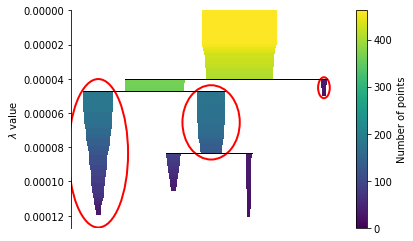

In [96]:
cluster_model.condensed_tree_.plot(select_clusters=True);